# KNN From Scratch

In [1]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import copy

# import KNN from knn.py
from bayes import NB

## Step 1: Import dataset


In [2]:
#load to dataframe
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
df = pd.read_csv(path, skiprows=2, index_col=False,encoding="utf8")

print('Original Dataset')
print(df.head())

#make categorical variables (except the target) into one-hot encoding
df = pd.get_dummies(df,columns=df.columns.values[:-1])

#transform the target into numeric codes
labelencoder= LabelEncoder()
df.unacc = labelencoder.fit_transform(df.unacc)

#inspect the head
print('\nProcessed Dataset')
print(df.head())

Original Dataset
   vhigh vhigh.1  2 2.1 small  high  unacc
0  vhigh   vhigh  2   2   med   low  unacc
1  vhigh   vhigh  2   2   med   med  unacc
2  vhigh   vhigh  2   2   med  high  unacc
3  vhigh   vhigh  2   2   big   low  unacc
4  vhigh   vhigh  2   2   big   med  unacc

Processed Dataset
   unacc  vhigh_high  vhigh_low  vhigh_med  vhigh_vhigh  vhigh.1_high  \
0      2           0          0          0            1             0   
1      2           0          0          0            1             0   
2      2           0          0          0            1             0   
3      2           0          0          0            1             0   
4      2           0          0          0            1             0   

   vhigh.1_low  vhigh.1_med  vhigh.1_vhigh  2_2  ...  2_5more  2.1_2  2.1_4  \
0            0            0              1    1  ...        0      1      0   
1            0            0              1    1  ...        0      1      0   
2            0            0   

## Load your data into X and y

In [3]:
X,y = df.drop('unacc',axis=1).values, df.unacc.values
# X,y = make_blobs(n_samples=300,centers=4,cluster_std=0.6,random_state=0)

## Plot X (Use this is X has 2-dimension)

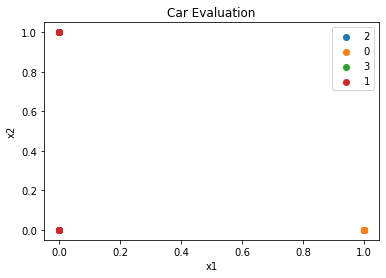

In [4]:
KNN().make_plot(y,X,'Car Evaluation')

## Define train test split

In [13]:
train_X, test_X, y_train, y_test = train_test_split(X,y,test_size=.2,stratify=y,random_state=0)

## Normalize the dataset

In [6]:
scalar = StandardScaler()
Xfit = scalar.fit(train_X)
X_train = Xfit.transform(train_X)
X_test = Xfit.transform(test_X)

## Fit the model

In [7]:
model = KNN().fit(X_train, y_train)

## Compute Accuracy

In [8]:
Train_pred_y = model.predict(X_train)
Test_pred_y = model.predict(X_test)

print('Train Accuracy {:0.2f}%'.format( model.evaluate(y_train,Train_pred_y)*100 ))
print('Test Accuracy {:0.2f}%'.format( model.evaluate(y_test,Test_pred_y)*100 ))

Train Accuracy 83.19%
Test Accuracy 68.41%


## Search for best k

In [9]:
max_k = int(np.sqrt(X_train.shape[0]))
print('Maximum k: '+str(max_k)+ '\n\nIterations\n'+'='*45+'\n') 

best_model = None
best_test_accuracy = 0
train,test = [],[]
all_k = range(1,max_k,2)

for k in all_k:

    #fit model
    model = KNN(k).fit(X_train, y_train)

    #predict train and test
    Train_pred_y = model.predict(X_train)
    Test_pred_y = model.predict(X_test)
    Train_pred_y = model.evaluate(y_train,Train_pred_y)*100
    Test_pred_y = model.evaluate(y_test,Test_pred_y)*100

    #add to lists
    train.append(Train_pred_y)
    test.append(Test_pred_y)

    #get best model
    if Test_pred_y > best_test_accuracy:
        best_test_accuracy = Test_pred_y
        best_model = copy.deepcopy(model)
    print('Train Accuracy: {:0.2f}%\tTest Accuracy: {:0.2f}%'.format( Train_pred_y, Test_pred_y ))

print('Best k: ',best_model.k)

Maximum k: 37

Iterations

Train Accuracy: 100.00%	Test Accuracy: 51.59%
Train Accuracy: 83.19%	Test Accuracy: 68.41%
Train Accuracy: 89.42%	Test Accuracy: 84.06%
Train Accuracy: 93.12%	Test Accuracy: 86.67%
Train Accuracy: 94.93%	Test Accuracy: 91.59%
Train Accuracy: 95.80%	Test Accuracy: 91.88%
Train Accuracy: 94.78%	Test Accuracy: 89.86%
Train Accuracy: 92.17%	Test Accuracy: 87.25%
Train Accuracy: 88.99%	Test Accuracy: 82.03%
Train Accuracy: 86.09%	Test Accuracy: 80.87%
Train Accuracy: 84.57%	Test Accuracy: 78.84%
Train Accuracy: 83.55%	Test Accuracy: 77.97%
Train Accuracy: 81.52%	Test Accuracy: 76.52%
Train Accuracy: 78.19%	Test Accuracy: 75.94%
Train Accuracy: 76.88%	Test Accuracy: 73.91%
Train Accuracy: 76.01%	Test Accuracy: 73.91%
Train Accuracy: 75.43%	Test Accuracy: 73.04%
Train Accuracy: 75.22%	Test Accuracy: 73.91%
Best k:  11


## Plot Accuracy curve

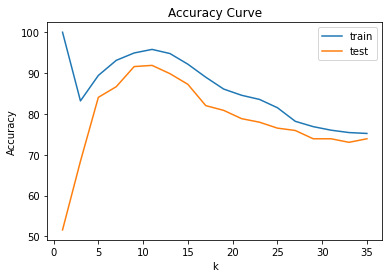

In [10]:
plt.plot(all_k,train,label='train')
plt.plot(all_k,test,label='test')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()

## Single value prediction with best model

In [14]:
features = test_X[0].reshape(1, -1)

features_norm = Xfit.transform(features)
y_pred = best_model.predict(features_norm)

print(features, y_pred)

[[0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0]] [2]
